In [47]:
import pandas as pd # data operation and data Wrangling
import numpy as np # number operation in array
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # data visualisation
from sklearn.model_selection import train_test_split  # split the data into train and tes
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression #logistic
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.metrics import roc_auc_score, accuracy_score,classification_report,roc_curve,recall_score,f1_score,precision_score # for evaluation metric

In [48]:
data = pd.read_csv(r"/content/reduced_dataset3.csv")

In [49]:
X = data.drop('num',axis=1)
y = data['num']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

#logistic reg

In [51]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

y_pred = log_model.predict(X_test)
y_proba =log_model.predict_proba(X_test)

classes = log_model.classes_

In [52]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("✅ Accuracy:", round(accuracy, 4))
print("✅ Precision:", round(precision, 4))
print("✅ Recall:", round(recall, 4))
print("✅ F1-Score:", round(f1, 4))

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        36
           1       0.29      0.22      0.25         9
           2       0.40      0.40      0.40         5
           3       0.50      0.43      0.46         7
           4       0.00      0.00      0.00         3

    accuracy                           0.68        60
   macro avg       0.40      0.40      0.40        60
weighted avg       0.62      0.68      0.65        60

✅ Accuracy: 0.6833
✅ Precision: 0.6202
✅ Recall: 0.6833
✅ F1-Score: 0.6478


In [53]:
# Binarize labels
y_test_binarized = label_binarize(y_test, classes=classes)

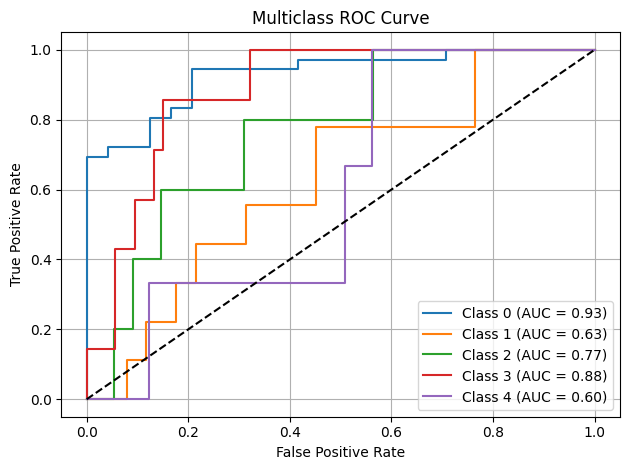

In [54]:
# Compute ROC curve and AUC for each class
for i in range(len(classes)):
    # Reshape y_proba[:, i] to a 2D array if it's 1D
    y_proba_reshaped = y_proba[:, i].reshape(-1, 1) if y_proba[:, i].ndim == 1 else y_proba[:, i]
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba_reshaped)
    auc_score = roc_auc_score(y_test_binarized[:, i], y_proba_reshaped)

    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

**RandomForestClassifier**

In [55]:
rfmodel = RandomForestClassifier(random_state=42)
rfmodel.fit(X_train, y_train)

y_pred = rfmodel.predict(X_test)
y_proba =rfmodel.predict_proba(X_test)

classes = rfmodel.classes_

In [56]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("✅ Accuracy:", round(accuracy, 4))
print("✅ Precision:", round(precision, 4))
print("✅ Recall:", round(recall, 4))
print("✅ F1-Score:", round(f1, 4))

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        36
           1       0.20      0.11      0.14         9
           2       0.29      0.40      0.33         5
           3       0.67      0.29      0.40         7
           4       0.00      0.00      0.00         3

    accuracy                           0.65        60
   macro avg       0.39      0.35      0.35        60
weighted avg       0.60      0.65      0.61        60

✅ Accuracy: 0.65
✅ Precision: 0.5952
✅ Recall: 0.65
✅ F1-Score: 0.6059


In [57]:
# Binarize labels
y_test_binarized = label_binarize(y_test, classes=classes)

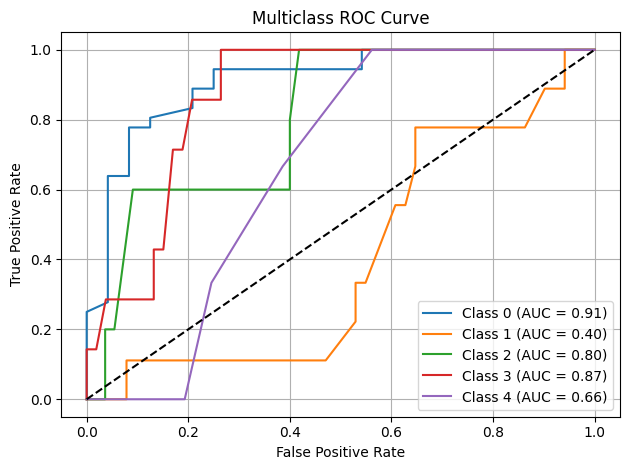

In [58]:
# Compute ROC curve and AUC for each class
for i in range(len(classes)):
    # Reshape y_proba[:, i] to a 2D array if it's 1D
    y_proba_reshaped = y_proba[:, i].reshape(-1, 1) if y_proba[:, i].ndim == 1 else y_proba[:, i]
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba_reshaped)
    auc_score = roc_auc_score(y_test_binarized[:, i], y_proba_reshaped)

    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

#svm

In [60]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
y_proba =svm_model.predict_proba(X_test)

classes =svm_model.classes_

In [61]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("✅ Accuracy:", round(accuracy, 4))
print("✅ Precision:", round(precision, 4))
print("✅ Recall:", round(recall, 4))
print("✅ F1-Score:", round(f1, 4))

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        36
           1       0.20      0.22      0.21         9
           2       0.00      0.00      0.00         5
           3       0.33      0.14      0.20         7
           4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.26      0.27      0.25        60
weighted avg       0.54      0.63      0.57        60

✅ Accuracy: 0.6333
✅ Precision: 0.5356
✅ Recall: 0.6333
✅ F1-Score: 0.5734


In [62]:
# Binarize labels
y_test_binarized = label_binarize(y_test, classes=classes)

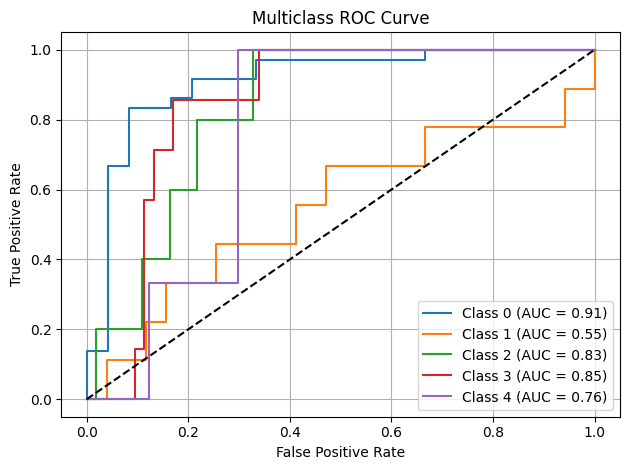

In [63]:
# Compute ROC curve and AUC for each class
for i in range(len(classes)):
    # Reshape y_proba[:, i] to a 2D array if it's 1D
    y_proba_reshaped = y_proba[:, i].reshape(-1, 1) if y_proba[:, i].ndim == 1 else y_proba[:, i]
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba_reshaped)
    auc_score = roc_auc_score(y_test_binarized[:, i], y_proba_reshaped)

    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

#Decision tree

In [64]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
y_proba =dt_model.predict_proba(X_test)

classes =dt_model.classes_

In [65]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("✅ Accuracy:", round(accuracy, 4))
print("✅ Precision:", round(precision, 4))
print("✅ Recall:", round(recall, 4))
print("✅ F1-Score:", round(f1, 4))

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        36
           1       0.12      0.22      0.16         9
           2       0.33      0.40      0.36         5
           3       0.25      0.29      0.27         7
           4       0.00      0.00      0.00         3

    accuracy                           0.50        60
   macro avg       0.31      0.31      0.31        60
weighted avg       0.59      0.50      0.54        60

✅ Accuracy: 0.5
✅ Precision: 0.59
✅ Recall: 0.5
✅ F1-Score: 0.5354


In [66]:
# Binarize labels
y_test_binarized = label_binarize(y_test, classes=classes)

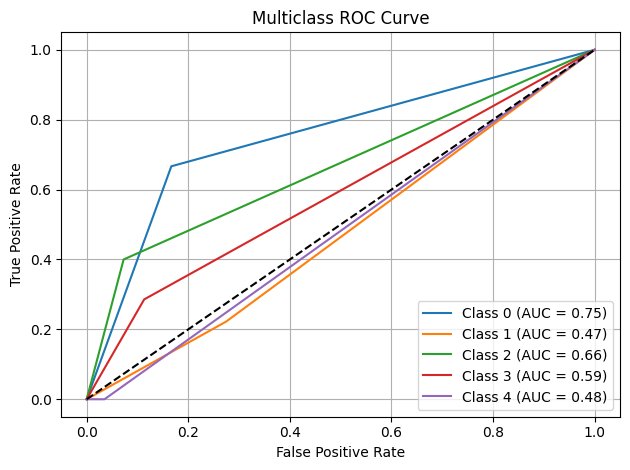

In [67]:
# Compute ROC curve and AUC for each class
for i in range(len(classes)):
    # Reshape y_proba[:, i] to a 2D array if it's 1D
    y_proba_reshaped = y_proba[:, i].reshape(-1, 1) if y_proba[:, i].ndim == 1 else y_proba[:, i]
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba_reshaped)
    auc_score = roc_auc_score(y_test_binarized[:, i], y_proba_reshaped)

    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()